In [1]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')

import re                                  
import string  
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer  

stopwords_english = stopwords.words('english') 

# !pip install tweet-preprocessor
import preprocessor as p

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avitr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from gensim.parsing.preprocessing import preprocess_string
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('E:\OneDrive - NITT\Custom_Download\data (2).csv',header=None,names=['tweets'])

# EDA

In [11]:
df['tweets_processed'] = df['tweets'].apply(lambda x :p.clean(x))

In [12]:
from gensim.parsing.preprocessing import remove_stopwords

In [13]:
df['tweets_processed']  = df['tweets_processed'] .apply(lambda x : remove_stopwords(x))

In [14]:
df['tweets_processed'] = df['tweets_processed'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

In [15]:
df['tweets_processed']  = df['tweets_processed'] .apply(lambda x : preprocess_string(x))

In [16]:
df['Nwords'] = df['tweets_processed'].apply(lambda x: len(x))

In [17]:
def clean(tweet):
    tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet2 = re.sub(r'#', '', tweet2)
    tweet2 = re.sub(r'@', '', tweet2)
    tweet2 = re.sub(r'[0-9]', '', tweet2)
    return tweet2

In [18]:
df['tweets_without_@#'] = df['tweets'].apply(lambda x: clean(x))

In [19]:
df['Nchars'] = df['tweets_without_@#'].apply(lambda x: len(x))

In [20]:
df

,tweets,tweets_processed,Nwords,tweets_without_@#,Nchars
0,@115712 I understand. I would like to assist y...,"[understand, like, assist, need, privat, secur...",8,I understand. I would like to assist you. We ...,114
1,@sprintcare and how do you propose we do that,[propos],1,sprintcare and how do you propose we do that,44
2,@sprintcare I have sent several private messag...,"[sent, privat, messag, respond, usual]",5,sprintcare I have sent several private message...,81
3,@115712 Please send us a Private Message so th...,"[send, privat, messag, assist, click, messag, ...",7,Please send us a Private Message so that we c...,117
4,@sprintcare I did.,[],0,sprintcare I did.,17
...,...,...,...,...,...
1048571,@393038 ... Along with your More card and addr...,"[card, address, detail, sort, thank, sammi]",6,... Along with your More card and address det...,99
1048572,@Morrisons https://t.co/mnGeW3E7N8,[],0,Morrisons,11
1048573,"@Morrisons watford, bought crayfish tails the ...","[watford, bought, crayfish, tail, dai, eat]",6,"Morrisons watford, bought crayfish tails the o...",80
1048574,"@393038 Hi Adam, I'm really sorry about this. ...","[adam, sorri, tell, barcod, batch, number, loo...",9,"Hi Adam, I'm really sorry about this. Can you...",121


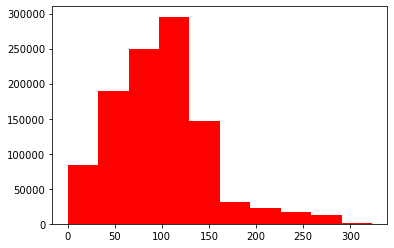

In [21]:
plt.hist(df['Nchars'],color='r')
plt.show()

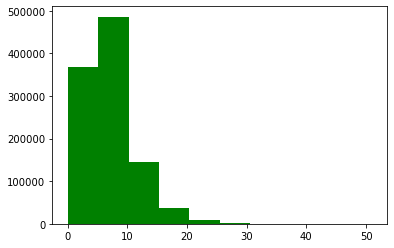

In [22]:
plt.hist(df['Nwords'],color='g')
plt.show()

In [23]:
import seaborn as sns

In [24]:
def remove_punc(x):
    txt = [word for word in x.split() if word not in string.punctuation]
    return ' '.join(txt)

In [25]:
df['tweets_without_@#'] = df['tweets_without_@#'].apply(lambda x: remove_punc(x))

In [26]:
def avg(x):
    txt = [len(word) for word in x.split()]
    
    return sum(txt)/max(len(txt),1)

In [27]:
df = df[df['Nchars']!=0]

In [28]:
df['avg_word_len'] = df['tweets_without_@#'].apply(lambda x: avg(x))

In [29]:
df

,tweets,tweets_processed,Nwords,tweets_without_@#,Nchars,avg_word_len
0,@115712 I understand. I would like to assist y...,"[understand, like, assist, need, privat, secur...",8,I understand. I would like to assist you. We w...,114,4.181818
1,@sprintcare and how do you propose we do that,[propos],1,sprintcare and how do you propose we do that,44,4.000000
2,@sprintcare I have sent several private messag...,"[sent, privat, messag, respond, usual]",5,sprintcare I have sent several private message...,81,4.857143
3,@115712 Please send us a Private Message so th...,"[send, privat, messag, assist, click, messag, ...",7,Please send us a Private Message so that we ca...,117,4.318182
4,@sprintcare I did.,[],0,sprintcare I did.,17,5.000000
...,...,...,...,...,...,...
1048571,@393038 ... Along with your More card and addr...,"[card, address, detail, sort, thank, sammi]",6,... Along with your More card and address deta...,99,4.105263
1048572,@Morrisons https://t.co/mnGeW3E7N8,[],0,Morrisons,11,9.000000
1048573,"@Morrisons watford, bought crayfish tails the ...","[watford, bought, crayfish, tail, dai, eat]",6,"Morrisons watford, bought crayfish tails the o...",80,4.714286
1048574,"@393038 Hi Adam, I'm really sorry about this. ...","[adam, sorri, tell, barcod, batch, number, loo...",9,"Hi Adam, I'm really sorry about this. Can you ...",121,4.260870


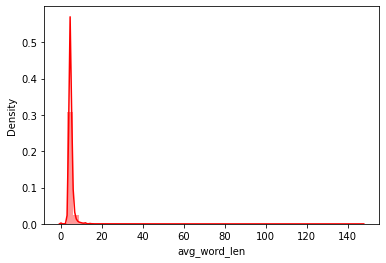

In [30]:
sns.distplot(df['avg_word_len'],color='red')
plt.show()

In [31]:
df

,tweets,tweets_processed,Nwords,tweets_without_@#,Nchars,avg_word_len
0,@115712 I understand. I would like to assist y...,"[understand, like, assist, need, privat, secur...",8,I understand. I would like to assist you. We w...,114,4.181818
1,@sprintcare and how do you propose we do that,[propos],1,sprintcare and how do you propose we do that,44,4.000000
2,@sprintcare I have sent several private messag...,"[sent, privat, messag, respond, usual]",5,sprintcare I have sent several private message...,81,4.857143
3,@115712 Please send us a Private Message so th...,"[send, privat, messag, assist, click, messag, ...",7,Please send us a Private Message so that we ca...,117,4.318182
4,@sprintcare I did.,[],0,sprintcare I did.,17,5.000000
...,...,...,...,...,...,...
1048571,@393038 ... Along with your More card and addr...,"[card, address, detail, sort, thank, sammi]",6,... Along with your More card and address deta...,99,4.105263
1048572,@Morrisons https://t.co/mnGeW3E7N8,[],0,Morrisons,11,9.000000
1048573,"@Morrisons watford, bought crayfish tails the ...","[watford, bought, crayfish, tail, dai, eat]",6,"Morrisons watford, bought crayfish tails the o...",80,4.714286
1048574,"@393038 Hi Adam, I'm really sorry about this. ...","[adam, sorri, tell, barcod, batch, number, loo...",9,"Hi Adam, I'm really sorry about this. Can you ...",121,4.260870


In [32]:
# x = [0]*len(string.punctuation)
punc = []
def f(x):
    for i in x:
        if i in string.punctuation:
            punc.append(i)

In [33]:
for i in df['tweets']:
    f(i)

In [34]:
from collections import Counter

<AxesSubplot:ylabel='count'>

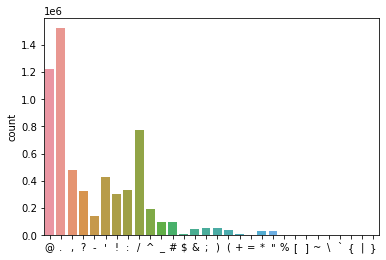

In [35]:
sns.countplot(punc)

In [36]:
words = []
for line in df['tweets_processed']:
    for j in line:
        words.append(j.lower())

In [37]:
words = Counter(words)
words = sorted(words.items(),key=lambda x: x[1],reverse=True)

In [38]:
d = words[:50]
x,y=zip(*d)

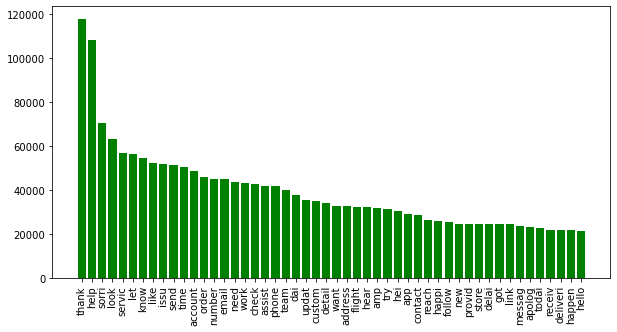

In [39]:
plt.figure(figsize=(10,5))
plt.bar(x,y,color='green')
plt.xticks(rotation=90)
plt.show()

# Topic Modeling

In [40]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet

In [41]:
df = df[df['tweets_processed'].apply(lambda x: True if len(x)!=0 else False)]

In [42]:
df = df[df['tweets_processed'].apply(lambda x: False if len(x)<=2 else True)]

In [43]:
texts = df['tweets_processed'].to_list()

In [44]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# LSI - Latent Semantic Indexing

In [45]:
corpus = corpus[:100]

In [46]:
lsi_model = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)
# lsi_model.show_topics(num_topics=10)
for idx, topic in lsi_model.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

Topic: 0 
Words: servic|becki|messag|account|help|send|privat|need|assist|custom|like|locat|sorri|hsb|dont|link|number|glad|look|concern|detail|secur|yall|understand|email|thank|acct|pai|have|share
Topic: 1 
Words: servic|messag|send|privat|assist|account|custom|need|like|link|understand|dont|yall|router|light|chang|nice|trippin|rep|start|go|imma|super|pai|worst|concern|equip|inform|color|bcw
Topic: 2 
Words: becki|help|servic|messag|sorri|send|treat|thank|privat|account|assist|share|need|halloween|glad|trick|happi|boorito|feel|tell|link|incred|great|look|investig|concern|dont|got|best|work
Topic: 3 
Words: need|messag|account|inform|send|order|correct|local|form|hsb|privat|assist|offic|number|servic|follow|email|locat|wai|incorrect|oc|takeov|consent|download|assumpt|outlet|wit|pertain|us|chat
Topic: 4 
Words: treat|help|walk|trick|halloween|happi|look|boorito|chipotl|share|year|glad|sorri|spend|dollar|home|routin|earlier|old|forward|got|thank|charg|have|friend|kind|hsb|messag|onesi|me

# LDA

In [47]:
lda_model = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)
for idx, topic in lda_model.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

Topic: 0 
Words: servic|assist|look|locat|messag|hsb|privat|excel|old|copi|kind|think|profil|need|duke|plenti|state|link|secur|line|understand|peopl|click|forward|area|halloween|treat|follow|happi|earlier
Topic: 1 
Words: order|extra|charg|corrupt|let|thank|data|fix|need|bag|download|inform|packag|mayb|sorri|wrap|requir|feel|dinner|prepackag|saturdai|spooki|playstat|shoot|provid|credit|liter|appli|form|us
Topic: 2 
Words: becki|concern|download|messag|like|send|want|glad|come|dai|adult|bought|pai|invit|point|incred|contact|dress|todai|feel|boorito|dont|llama|halloween|investig|copi|hei|basic|respond|particip
Topic: 3 
Words: depart|experi|unawa|guac|email|try|offic|liter|corpor|format|worst|gone|equip|number|great|becki|happi|pai|area|servic|particular|phone|iv|isp|help|messag|account|jai|like|acm
Topic: 4 
Words: glad|becki|parti|life|share|inconveni|fun|collin|suck|like|connect|phone|pertain|heard|ethernet|need|help|assist|acct|tell|correct|dont|account|prais|wifi|assumpt|downstair|l

In [48]:
!pip install pyLDAvis

In [49]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [50]:
pyLDAvis.enable_notebook()
gensimvis.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.002630  0.000113       1        1  15.972981
2      0.000927  0.001715       2        1  13.001015
5      0.000914 -0.001223       3        1  12.460366
0      0.000377 -0.000049       4        1  10.937593
6     -0.000011  0.000473       5        1  10.587749
8      0.000186 -0.001080       6        1  10.074486
9      0.000102  0.000399       7        1   9.684584
4      0.000169 -0.000005       8        1   6.908678
7     -0.000059 -0.000222       9        1   5.752461
3      0.000025 -0.000121      10        1   4.620086, topic_info=         Term      Freq     Total Category  logprob  loglift
18     servic  0.000000  0.000000  Default  30.0000  30.0000
108      help  0.000000  0.000000  Default  29.0000  29.0000
191     becki  0.000000  0.000000  Default  28.0000  28.0000
295  download  0.000000  0.000000  Default  27.0000  27.0000
13       send  0.000000  0.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
7      messag  0.000285  0.064755  Topic10 -11.5349  -2.3521
14    account  0.000285  0.063161  Topic10 -11.5349  -2.3271
137       jai  0.000285  0.028996  Topic10 -11.5349  -1.5486
1        like  0.000285  0.044301  Topic10 -11.5350  -1.9725
121       acm  0.000285  0.027803  Topic10 -11.5350  -1.5066

[445 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 6, 1, 7, 9, 10, 5, 8, 4])

In [51]:
df.shape

(927292, 6)